# Analysis on Video Game Sales since 1980

**First, lets take a look at the first five rows data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

vg_sales = pd.read_csv('vgsales.csv')
print(vg_sales.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [2]:
years = [2016, 2017, 2020]
total_sales_group = vg_sales.groupby(['Year']).sum().drop(years)
average_sales_group = vg_sales.groupby(['Year']).mean().drop(years)
count_sales_group = vg_sales.replace(0, np.nan).groupby(['Year']).count().drop(years)

In [3]:
def lineplot(df, title = 'Sales by Year', ylabel ='Sales' , legendsize = 10, legendloc = 'upper left'):

    year = df.index.values
    na = df.NA_Sales
    eu = df.EU_Sales
    jp = df.JP_Sales
    other = df.Other_Sales
    global_ = df.Global_Sales
    
    if df is count_sales_group:
        region_list = [na, eu, jp, other]
        columns = ['NA', 'EU', 'JP', 'OTHER']
    else:
        region_list = [na, eu, jp, other, global_]
        columns = ['NA', 'EU', 'JP', 'OTHER', 'WORLD WIDE']

    for i, region in enumerate(region_list):
        plt.plot(year, region, label = columns[i])

    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.title(title)
    plt.legend(loc=legendloc, prop = {'size':legendsize})
    plt.show()
    plt.clf()

    for i, region in enumerate(region_list):
        plt.plot(year, region, label = columns[i])

    plt.yscale('log')
    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.title(title + '(Log)')
    plt.legend(loc=legendloc, prop = {'size':legendsize})
    plt.show()
    plt.clf()

**I am interested in seeing how sales overall have done since 1980. I have included both a linear scale and a logarithmic scale.**

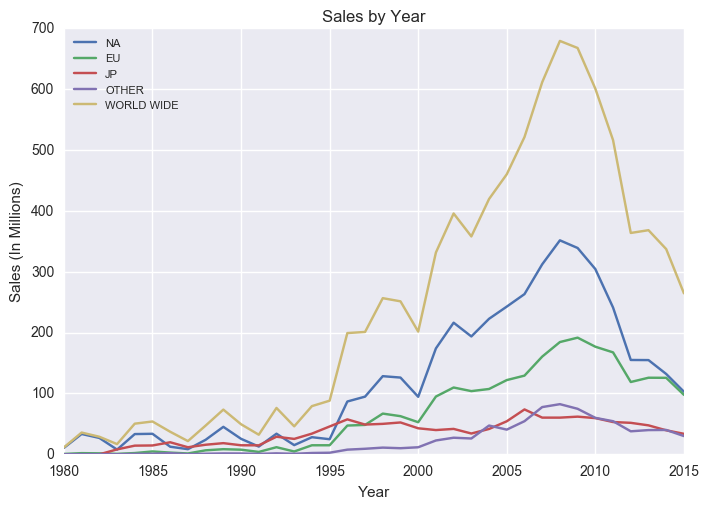

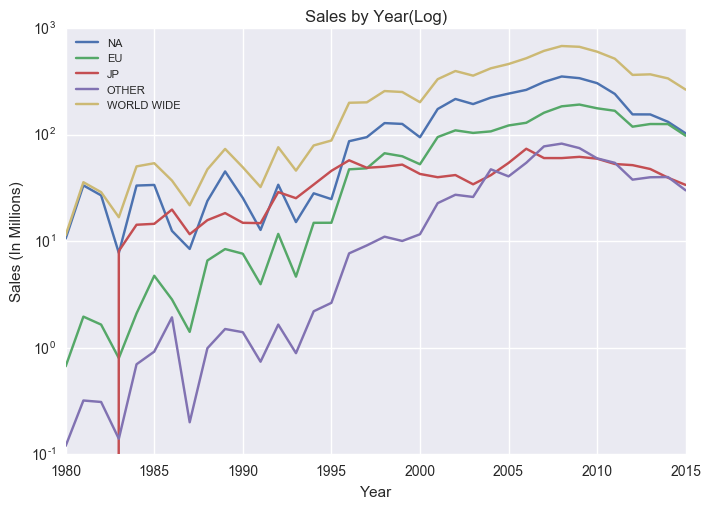

In [4]:
lineplot(total_sales_group, title = 'Sales by Year', ylabel ='Sales (In Millions)', legendsize = 8)

**In the top graph, We can see that sales have been continually increasing. There was a peak in 2008, which was around the start of the recession, which affected the video game industry as severely as many other industries.**

**In the bottom graph, we get a good look into how sales did between the regions. We can see that The United States has been the leader in video game sales for the most part. Japan looks like it was able to surpass The United States briefly between 1992 and 1996. I am curious to see what games were so popular between those years in Japan, so we'll take a quick look at that.**

**Below are the top 20 games where sales in Japan outperformed The United States, during this time period.**

In [5]:
japan1992_1996 = vg_sales[['Name', 'JP_Sales', 'NA_Sales']][(vg_sales.Year>=1992) & (vg_sales.Year<=1996) & (vg_sales.JP_Sales > vg_sales.NA_Sales)].sort(columns = 'JP_Sales', ascending = False)
print(japan1992_1996.head(20))

                                                   Name  JP_Sales  NA_Sales
76                                     Super Mario Kart      3.81      3.54
426                Dragon Quest VI: Maboroshi no Daichi      3.19      0.00
136                Street Fighter II: The World Warrior      2.87      2.47
531                  Dragon Quest V: Tenkuu no Hanayome      2.78      0.00
389                                   Final Fantasy III      2.55      0.86
629                                     Final Fantasy V      2.43      0.00
187           Donkey Kong Country 2: Diddy's Kong Quest      2.20      2.10
285                             Street Fighter II Turbo      2.10      1.42
688                                      Chrono Trigger      2.02      0.28
282                 Super Mario World 2: Yoshi's Island      1.76      1.65
372   Donkey Kong Country 3: Dixie Kong's Double Tro...      1.75      1.17
1054                                    Super Puyo Puyo      1.69      0.00
948         

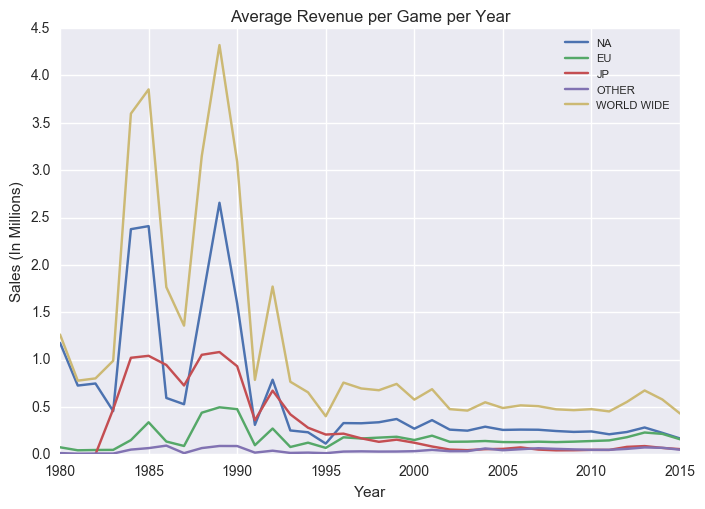

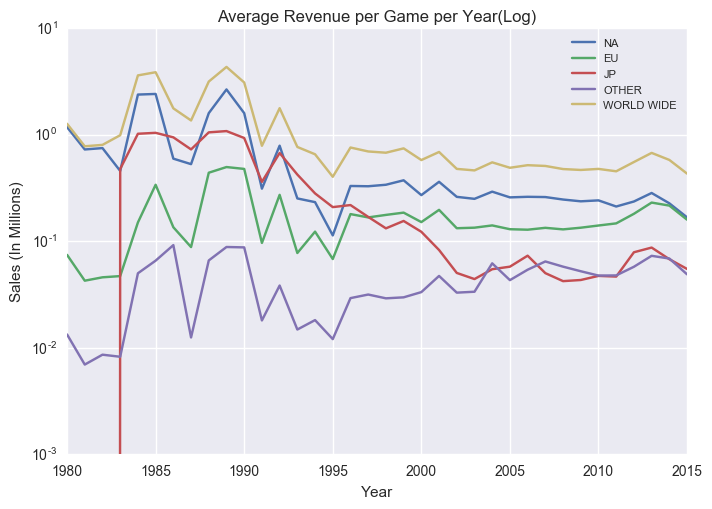

In [6]:
lineplot(average_sales_group, title = 'Average Revenue per Game per Year', ylabel ='Sales (In Millions)', legendsize = 8, legendloc = 'upper right')

**Another important trend to note, given by the above graphs is that average revenue per game produced had decreased dramatically after the late 80's. This could possibly have been due to a decrease in cost to produce this technology, now that it had been around for some time.**

**So.... If sales overall increased, and revenue per game decreased, it must mean that more games were being produced, which is something that we'll look into next.**

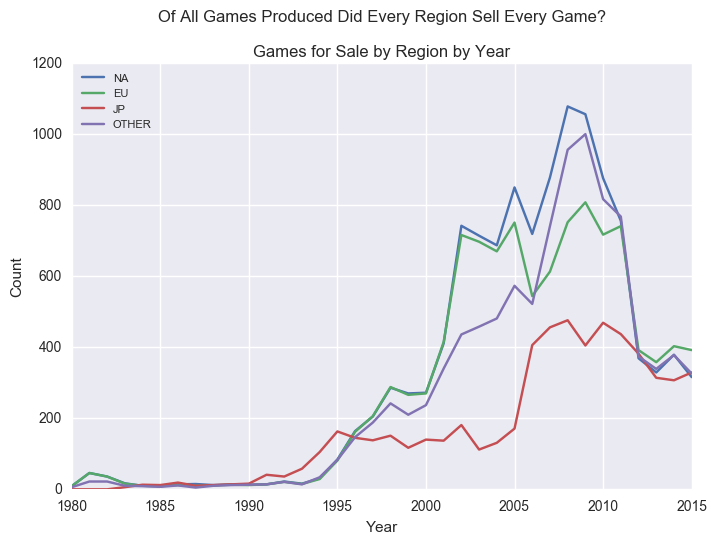

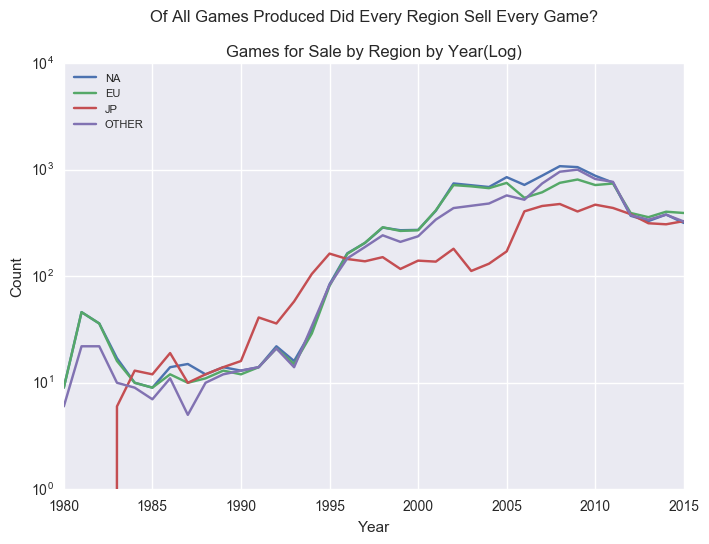

In [7]:
lineplot(count_sales_group, title = 'Of All Games Produced Did Every Region Sell Every Game?\n\nGames for Sale by Region by Year', ylabel ='Count', legendsize = 8, legendloc = 'upper left')

## Final Thoughts

**From our graphs above, we can see that the industry was booming in the late 90's and beyond. It seems as though the industry had become very effecient in production, and was able to produce more volume, which resulted in higher revenue.**

**Japans revenue declines as we saw earlier started in the late 90's. As we can see from our graph, it seems that many games that were being introduced in other parts of the world were not being introduced in Japan, which could have resulted in the big revenue losses.**

### Fun Fact:
#### - What are top 20 highest grossing games since 1980?

In [8]:
Top_games = vg_sales[['Name', 'Year','Global_Sales']].sort(columns = 'Global_Sales', ascending = False)
print(Top_games.head(20))

                                            Name    Year  Global_Sales
0                                     Wii Sports  2006.0         82.74
1                              Super Mario Bros.  1985.0         40.24
2                                 Mario Kart Wii  2008.0         35.82
3                              Wii Sports Resort  2009.0         33.00
4                       Pokemon Red/Pokemon Blue  1996.0         31.37
5                                         Tetris  1989.0         30.26
6                          New Super Mario Bros.  2006.0         30.01
7                                       Wii Play  2006.0         29.02
8                      New Super Mario Bros. Wii  2009.0         28.62
9                                      Duck Hunt  1984.0         28.31
10                                    Nintendogs  2005.0         24.76
11                                 Mario Kart DS  2005.0         23.42
12                   Pokemon Gold/Pokemon Silver  1999.0         23.10
13    